<a href="https://colab.research.google.com/github/alexandre-pinon/zoidberg-2.0/blob/main/zoidberg_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zoidberg 2.0

**Given some X-ray images, use machine learning to help doctors detecting pneumonia.**

## Notebook Config

In [9]:
DATASET_DIR = "/content/zoidberg-2.0/chest_Xray_binary"

## Load data

In [3]:
!git clone -b colab-data "https://github.com/alexandre-pinon/zoidberg-2.0.git"

Cloning into 'zoidberg-2.0'...
remote: Enumerating objects: 5904, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5904 (delta 0), reused 2 (delta 0), pack-reused 5902
Receiving objects: 100% (5904/5904), 1.13 GiB | 27.20 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Checking out files: 100% (11712/11712), done.


## Inspect data

In [10]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk(DATASET_DIR):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/zoidberg-2.0/chest_Xray_binary'.
There are 2 directories and 0 images in '/content/zoidberg-2.0/chest_Xray_binary/train'.
There are 0 directories and 3875 images in '/content/zoidberg-2.0/chest_Xray_binary/train/pneumonia'.
There are 0 directories and 1341 images in '/content/zoidberg-2.0/chest_Xray_binary/train/normal'.
There are 2 directories and 0 images in '/content/zoidberg-2.0/chest_Xray_binary/val'.
There are 0 directories and 8 images in '/content/zoidberg-2.0/chest_Xray_binary/val/pneumonia'.
There are 0 directories and 8 images in '/content/zoidberg-2.0/chest_Xray_binary/val/normal'.
There are 2 directories and 0 images in '/content/zoidberg-2.0/chest_Xray_binary/test'.
There are 0 directories and 390 images in '/content/zoidberg-2.0/chest_Xray_binary/test/pneumonia'.
There are 0 directories and 234 images in '/content/zoidberg-2.0/chest_Xray_binary/test/normal'.


In [11]:
train_dir = f"{DATASET_DIR}/train/"
val_dir = f"{DATASET_DIR}/val/"
test_dir = f"{DATASET_DIR}/test/"

In [12]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['normal' 'pneumonia']


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, class_names):
  n_images = 10
  fig, ax = plt.subplots(2, 5, figsize=(24, 8))

  # Read in the image and plot it using matplotlib
  for i in range(n_images):
    target_class = random.choice(class_names)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)[0]

    index = (0, i) if i < 5 else (1, i - 5)
    img = mpimg.imread(f'{target_folder}/{random_image}')
    ax[index].imshow(img, cmap='bone')
    ax[index].set_title(target_class)
    ax[index].set_frame_on(False)
    ax[index].set_xticks([])
    ax[index].set_yticks([])
    ax[index].set_xlabel(f"{img.shape}")

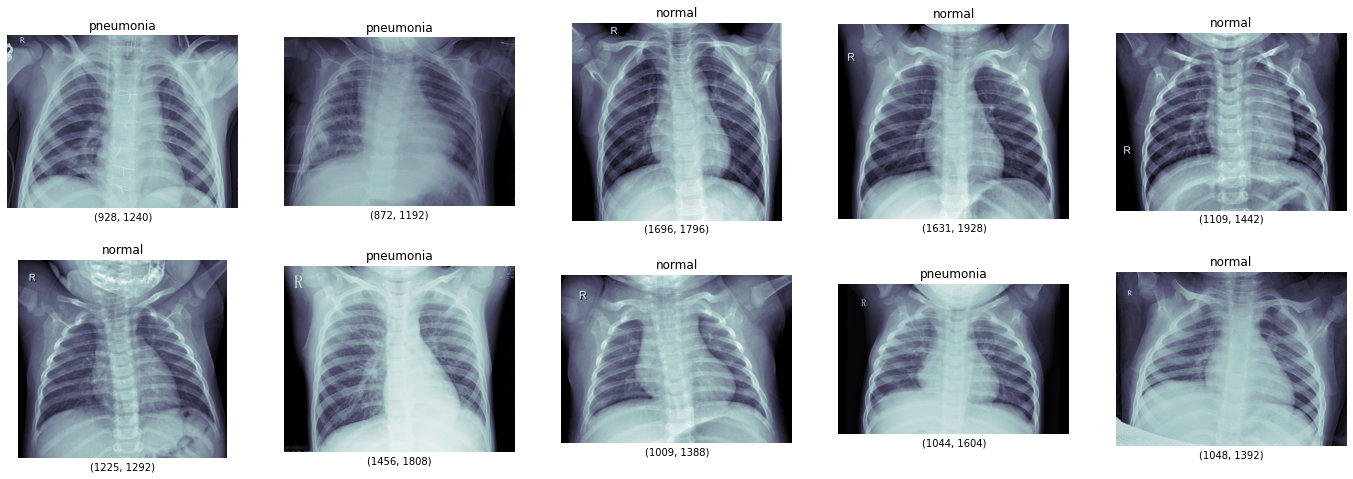

In [28]:
# View a random image from the training dataset
img = view_random_images(target_dir=train_dir,
                         class_names=class_names)